In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("velib_backup.csv")

In [3]:
df.head()

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime
0,NaN,213688169,14,NaN,NaN,21,1,1,1,1731677115,1731677400
1,NaN,17278902806,4,NaN,NaN,16,1,1,1,1731677359,1731677400
2,NaN,36255,3,NaN,NaN,18,1,1,1,1731677171,1731677400
3,NaN,251039991,8,NaN,NaN,17,1,1,1,1731677193,1731677400
4,NaN,85002689,25,NaN,NaN,35,1,1,1,1731677275,1731677400


In [4]:
df_no_na = df.dropna()

In [5]:
df_no_na['api_calltime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')
df_no_na['last_reported'] = pd.to_datetime(df_no_na['last_reported'], unit='s')


/tmp/ipykernel_2636/4150218823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['api_calltime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')
/tmp/ipykernel_2636/4150218823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['last_reported'] = pd.to_datetime(df_no_na['last_reported'], unit='s')


In [6]:
df_no_na

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime
1485,16107.0,213688169,15,10.0,5.0,20,1,1,1,2024-11-15 13:25:15,2024-11-15 13:45:01
1486,44015.0,17278902806,4,1.0,3.0,16,1,1,1,2024-11-15 13:28:26,2024-11-15 13:45:01
1487,9020.0,36255,3,1.0,2.0,18,1,1,1,2024-11-15 13:26:11,2024-11-15 13:45:01
1488,14111.0,251039991,2,0.0,2.0,17,1,1,1,2024-11-15 13:26:33,2024-11-15 13:45:01
1489,14014.0,85002689,26,17.0,9.0,34,1,1,1,2024-11-15 13:27:55,2024-11-15 13:45:01
...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,2024-12-08 12:31:19,2024-12-08 13:00:01
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,2024-12-08 12:28:40,2024-12-08 13:00:01
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,2024-12-08 12:30:23,2024-12-08 13:00:01
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,2024-12-08 12:30:29,2024-12-08 13:00:01


In [7]:
import requests

# API URL
api_url = "https://velib-metropole-opendata.smovengo.cloud/opendata/Velib_Metropole/station_information.json"

# Fetch data from the API
response = requests.get(api_url)
data = response.json()

# Extract station_id, lat, and lon
stations = data['data']['stations']
station_location_dict = {station['station_id']: (station['lat'], station['lon']) for station in stations}

# Print the dictionary (key: station_id, value: (lat, lon))
print(station_location_dict)


{213688169: (48.865983, 2.275725), 19179944124: (48.798922410229, 2.4537451531298), 17278902806: (48.778192750803, 2.3963020229163), 36255: (48.87929591733507, 2.3373600840568547), 251039991: (48.837525839067, 2.3360354080796), 85002689: (48.819428333369, 2.3433353751898), 2515829865: (48.93626891059109, 2.3588666820200914), 516709288: (48.855907555969, 2.3925706744194), 120827885: (48.875448033960744, 2.315508019010038), 66491398: (48.835092787824, 2.3534681351338), 37874517: (48.85165383178419, 2.3308077827095985), 210565680: (48.848563233059, 2.3204218259346), 210403080: (48.84389286531899, 2.3519663885235786), 210561800: (48.84708159081946, 2.321374788880348), 209063434: (48.91039875761846, 2.3851355910301213), 94555589: (48.81580226360801, 2.376804985105991), 19331959862: (48.779035118572, 2.4609763908985), 43195240: (48.835583838706, 2.2325500845909), 501862076: (48.862453313908, 2.1961666225454), 17486274358: (48.908168131015, 2.4530601033354), 210566542: (48.851296433665276, 2.

In [8]:
import json
import requests

# Load JSON data from a local file
with open("station_information.json", "r") as file:
    data = json.load(file)

stations = data['data']['stations']
station_location_dict = {station['station_id']: (station['lat'], station['lon']) for station in stations}


In [9]:
station_location_dict

{213688169: (48.865983, 2.275725),
 19179944124: (48.798922410229, 2.4537451531298),
 17278902806: (48.778192750803, 2.3963020229163),
 36255: (48.87929591733507, 2.3373600840568547),
 251039991: (48.837525839067, 2.3360354080796),
 85002689: (48.819428333369, 2.3433353751898),
 2515829865: (48.93626891059109, 2.3588666820200914),
 516709288: (48.855907555969, 2.3925706744194),
 120827885: (48.875448033960744, 2.315508019010038),
 66491398: (48.835092787824, 2.3534681351338),
 37874517: (48.85165383178419, 2.3308077827095985),
 210565680: (48.848563233059, 2.3204218259346),
 210403080: (48.84389286531899, 2.3519663885235786),
 210561800: (48.84708159081946, 2.321374788880348),
 209063434: (48.91039875761846, 2.3851355910301213),
 94555589: (48.81580226360801, 2.376804985105991),
 19331959862: (48.779035118572, 2.4609763908985),
 43195240: (48.835583838706, 2.2325500845909),
 501862076: (48.862453313908, 2.1961666225454),
 17486274358: (48.908168131015, 2.4530601033354),
 210566542: (48

In [10]:
import pandas as pd

# Assuming your DataFrame is named df_no_na
# Map the latitude and longitude to the DataFrame
df_no_na['lat'] = df_no_na['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[0])
df_no_na['lon'] = df_no_na['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[1])

# Display the updated DataFrame
print(df_no_na)


/tmp/ipykernel_2636/1830894157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['lat'] = df_no_na['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[0])


         stationCode   station_id  num_bikes_available  \
1485         16107.0    213688169                   15   
1486         44015.0  17278902806                    4   
1487          9020.0        36255                    3   
1488         14111.0    251039991                    2   
1489         14014.0     85002689                   26   
...              ...          ...                  ...   
3277714       4010.0    476155906                   43   
3277715       4005.0    516395829                   13   
3277716       8004.0    315022587                   45   
3277717      42004.0    368766689                   23   
3277718       9104.0    129026597                   13   

         num_bikes_available_mechanical  num_bikes_available_ebike  \
1485                               10.0                        5.0   
1486                                1.0                        3.0   
1487                                1.0                        2.0   
1488                   

/tmp/ipykernel_2636/1830894157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['lon'] = df_no_na['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[1])


In [11]:
response = requests.get(api_url, timeout=10)


In [12]:
df_no_na[df_no_na.isna() == True].value_counts()

Series([], dtype: int64)

In [13]:
df_no_na

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime,lat,lon
1485,16107.0,213688169,15,10.0,5.0,20,1,1,1,2024-11-15 13:25:15,2024-11-15 13:45:01,48.865983,2.275725
1486,44015.0,17278902806,4,1.0,3.0,16,1,1,1,2024-11-15 13:28:26,2024-11-15 13:45:01,48.778193,2.396302
1487,9020.0,36255,3,1.0,2.0,18,1,1,1,2024-11-15 13:26:11,2024-11-15 13:45:01,48.879296,2.337360
1488,14111.0,251039991,2,0.0,2.0,17,1,1,1,2024-11-15 13:26:33,2024-11-15 13:45:01,48.837526,2.336035
1489,14014.0,85002689,26,17.0,9.0,34,1,1,1,2024-11-15 13:27:55,2024-11-15 13:45:01,48.819428,2.343335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,2024-12-08 12:31:19,2024-12-08 13:00:01,48.855022,2.361232
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,2024-12-08 12:28:40,2024-12-08 13:00:01,48.851297,2.362453
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,2024-12-08 12:30:23,2024-12-08 13:00:01,48.870406,2.323244
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,2024-12-08 12:30:29,2024-12-08 13:00:01,48.819116,2.396664


In [14]:
df_no_na.to_csv("df_no_na.csv")

In [15]:
import pandas as pd

# Convert 'api_calltime' to a datetime format if not already done
df_no_na['api_call_datetime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')

# Add a new column with the day of the week
df_no_na['day_of_week'] = df_no_na['api_call_datetime'].dt.day_name()

# Display the updated DataFrame
print(df_no_na)


/tmp/ipykernel_2636/260760263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['api_call_datetime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')


         stationCode   station_id  num_bikes_available  \
1485         16107.0    213688169                   15   
1486         44015.0  17278902806                    4   
1487          9020.0        36255                    3   
1488         14111.0    251039991                    2   
1489         14014.0     85002689                   26   
...              ...          ...                  ...   
3277714       4010.0    476155906                   43   
3277715       4005.0    516395829                   13   
3277716       8004.0    315022587                   45   
3277717      42004.0    368766689                   23   
3277718       9104.0    129026597                   13   

         num_bikes_available_mechanical  num_bikes_available_ebike  \
1485                               10.0                        5.0   
1486                                1.0                        3.0   
1487                                1.0                        2.0   
1488                   

/tmp/ipykernel_2636/260760263.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['day_of_week'] = df_no_na['api_call_datetime'].dt.day_name()


/tmp/ipykernel_2636/1016709832.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')


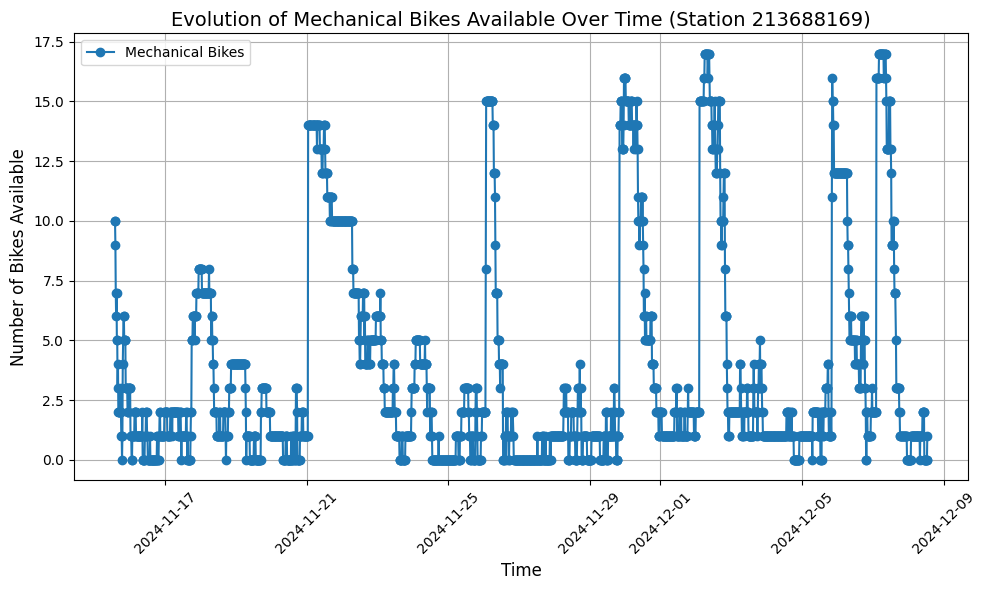

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the specific station
station_data = df_no_na[df_no_na['station_id'] == 213688169]

# Convert 'api_calltime' to datetime if not already done
station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')

# Sort data by time
station_data = station_data.sort_values(by='api_call_datetime')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(station_data['api_call_datetime'], station_data['num_bikes_available_mechanical'], marker='o', linestyle='-', label='Mechanical Bikes')

# Customize the plot
plt.title('Evolution of Mechanical Bikes Available Over Time (Station 213688169)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Bikes Available', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_2636/2304965856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')


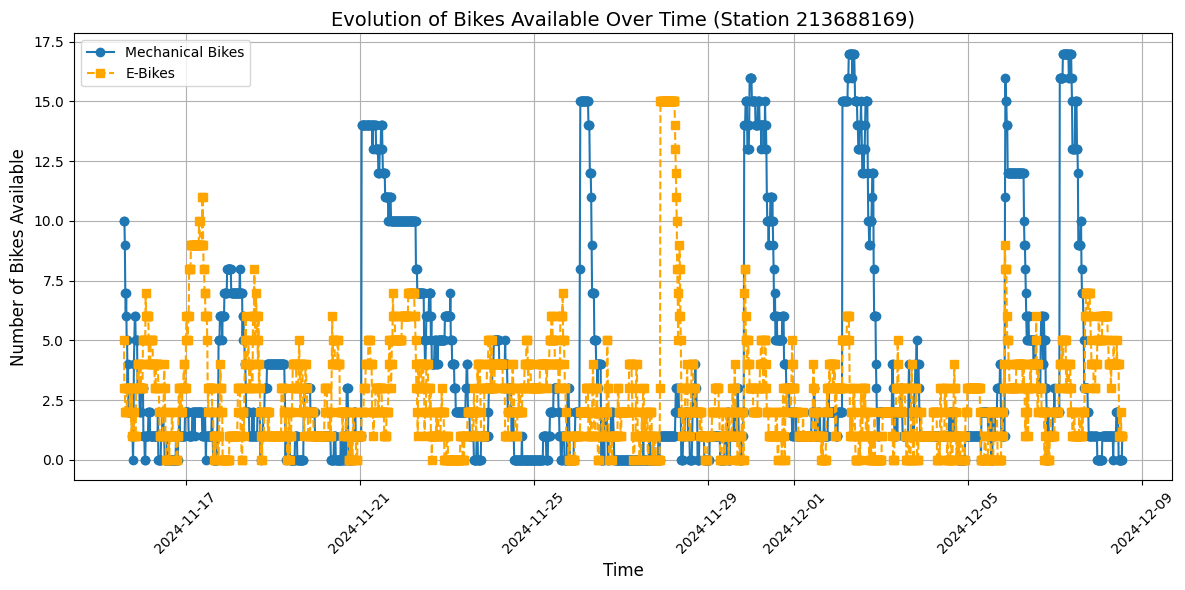

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the specific station
station_data = df_no_na[df_no_na['station_id'] == 213688169]

# Convert 'api_calltime' to datetime if not already done
station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')

# Sort data by time
station_data = station_data.sort_values(by='api_call_datetime')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot mechanical bikes
plt.plot(station_data['api_call_datetime'], station_data['num_bikes_available_mechanical'],
         marker='o', linestyle='-', label='Mechanical Bikes')

# Plot e-bikes
plt.plot(station_data['api_call_datetime'], station_data['num_bikes_available_ebike'],
         marker='s', linestyle='--', label='E-Bikes', color='orange')

# Customize the plot
plt.title('Evolution of Bikes Available Over Time (Station 213688169)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Bikes Available', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_2636/2898221599.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')


Text(0.5, 0, 'Time')

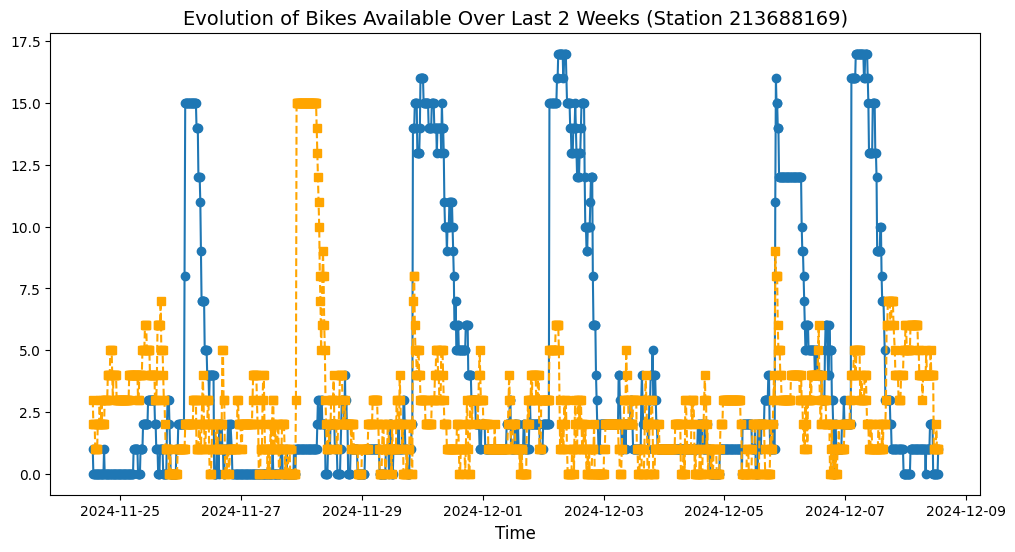

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Filter data for the specific station
station_data = df_no_na[df_no_na['station_id'] == 213688169]

# Convert 'api_calltime' to datetime if not already done
station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')

# Calculate the cutoff date (last 2 weeks)
cutoff_date = station_data['api_call_datetime'].max() - timedelta(weeks=2)

# Filter data for the last 2 weeks
station_data_last_2_weeks = station_data[station_data['api_call_datetime'] >= cutoff_date]

# Sort data by time
station_data_last_2_weeks = station_data_last_2_weeks.sort_values(by='api_call_datetime')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot mechanical bikes
plt.plot(station_data_last_2_weeks['api_call_datetime'],
         station_data_last_2_weeks['num_bikes_available_mechanical'],
         marker='o', linestyle='-', label='Mechanical Bikes')

# Plot e-bikes
plt.plot(station_data_last_2_weeks['api_call_datetime'],
         station_data_last_2_weeks['num_bikes_available_ebike'],
         marker='s', linestyle='--', label='E-Bikes', color='orange')

# Customize the plot
plt.title('Evolution of Bikes Available Over Last 2 Weeks (Station 213688169)', fontsize=14)
plt.xlabel('Time', fontsize=12)


/tmp/ipykernel_2636/1631999838.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')


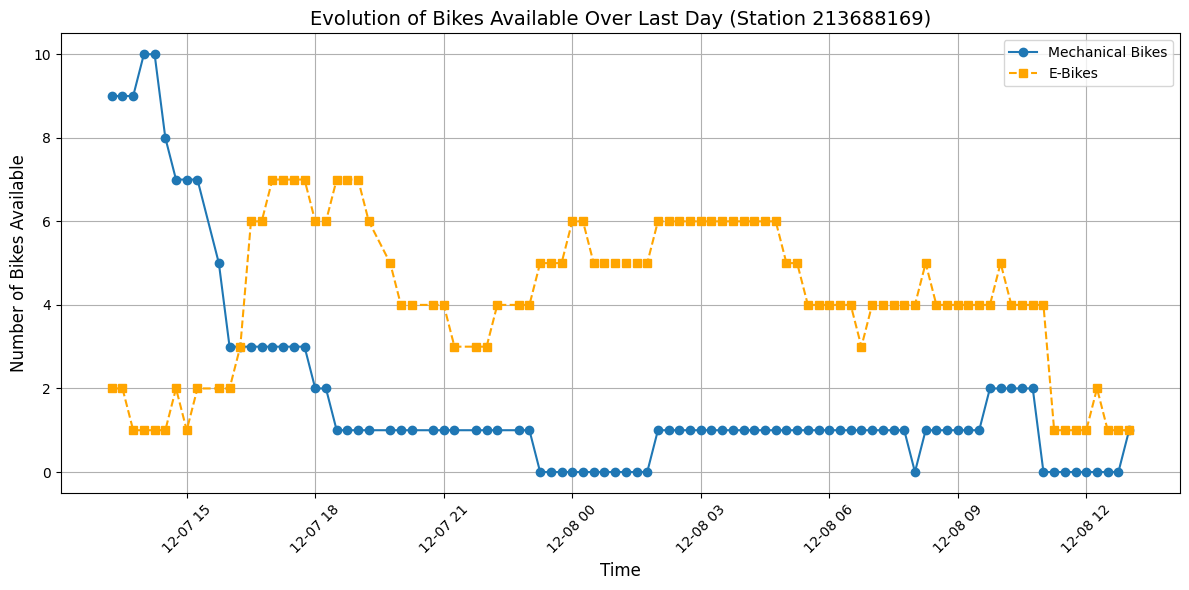

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Filter data for the specific station
station_data = df_no_na[df_no_na['station_id'] == 213688169]

# Convert 'api_calltime' to datetime if not already done
station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')

# Calculate the cutoff date (last 1 day)
cutoff_date = station_data['api_call_datetime'].max() - timedelta(days=1)

# Filter data for the last 1 day
station_data_last_day = station_data[station_data['api_call_datetime'] >= cutoff_date]

# Sort data by time
station_data_last_day = station_data_last_day.sort_values(by='api_call_datetime')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot mechanical bikes
plt.plot(station_data_last_day['api_call_datetime'],
         station_data_last_day['num_bikes_available_mechanical'],
         marker='o', linestyle='-', label='Mechanical Bikes')

# Plot e-bikes
plt.plot(station_data_last_day['api_call_datetime'],
         station_data_last_day['num_bikes_available_ebike'],
         marker='s', linestyle='--', label='E-Bikes', color='orange')

# Customize the plot
plt.title('Evolution of Bikes Available Over Last Day (Station 213688169)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Bikes Available', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Time series - ARIMA

In [20]:
### Velib station close to Falguiere
# 15112, 15113, 15132, 15017
# Further 15004,15027, 15018


In [21]:
station_1_data = df_no_na[df_no_na['stationCode'] == 15112]
station_2_data = df_no_na[df_no_na['stationCode'] == 15113]
station_3_data = df_no_na[df_no_na['stationCode'] == 15132]
station_4_data = df_no_na[df_no_na['stationCode'] == 15017]
station_5_data = df_no_na[df_no_na['stationCode'] == 15004]
station_6_data = df_no_na[df_no_na['stationCode'] == 15027]
station_7_data = df_no_na[df_no_na['stationCode'] == 15018]
listi = [station_7_data,station_6_data,station_5_data,station_4_data,station_3_data,station_2_data,station_1_data]

In [22]:
df_all = pd.concat(listi,axis = 0)

In [23]:
df_all

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime,lat,lon,api_call_datetime,day_of_week
2612,15018.0,82468690,1,1.0,0.0,55,1,1,1,2024-11-15 13:20:06,2024-11-15 13:45:01,48.836826,2.307170,2024-11-15 13:45:01,Friday
4097,15018.0,82468690,1,1.0,0.0,55,1,1,1,2024-11-15 13:20:06,2024-11-15 14:00:01,48.836826,2.307170,2024-11-15 14:00:01,Friday
5582,15018.0,82468690,1,0.0,1.0,55,1,1,1,2024-11-15 13:20:06,2024-11-15 14:15:01,48.836826,2.307170,2024-11-15 14:15:01,Friday
7067,15018.0,82468690,3,2.0,1.0,53,1,1,1,2024-11-15 14:24:50,2024-11-15 14:30:00,48.836826,2.307170,2024-11-15 14:30:00,Friday
8552,15018.0,82468690,2,2.0,0.0,54,1,1,1,2024-11-15 14:24:50,2024-11-15 14:45:01,48.836826,2.307170,2024-11-15 14:45:01,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270347,15112.0,576188379,2,1.0,1.0,22,1,1,1,2024-12-08 11:23:21,2024-12-08 12:00:01,48.838684,2.311042,2024-12-08 12:00:01,Sunday
3271833,15112.0,576188379,3,1.0,2.0,21,1,1,1,2024-12-08 11:23:21,2024-12-08 12:15:01,48.838684,2.311042,2024-12-08 12:15:01,Sunday
3273319,15112.0,576188379,7,2.0,5.0,17,1,1,1,2024-12-08 11:23:21,2024-12-08 12:30:00,48.838684,2.311042,2024-12-08 12:30:00,Sunday
3274805,15112.0,576188379,7,3.0,4.0,17,1,1,1,2024-12-08 12:27:21,2024-12-08 12:45:00,48.838684,2.311042,2024-12-08 12:45:00,Sunday


In [24]:
def week_end(x):
    if x in ["Sunday","Saturday"]:
        return 1
    else:
        return 0


In [25]:
df_all.columns

Index(['stationCode', 'station_id', 'num_bikes_available',
       'num_bikes_available_mechanical', 'num_bikes_available_ebike',
       'num_docks_available', 'is_installed', 'is_returning', 'is_renting',
       'last_reported', 'api_calltime', 'lat', 'lon', 'api_call_datetime',
       'day_of_week'],
      dtype='object')

In [26]:
df_all["is_weekend"] = df_all["day_of_week"].apply(week_end)

In [27]:
df_all["api_call_datetime"] = pd.to_datetime(df_all["api_call_datetime"])
df_all["api_call_datetime_hourly"] = df_all["api_call_datetime"].dt.floor("H")


In [28]:
# Aggregating by sum on `api_call_datetime_hourly`
aggregated_df = df_all.groupby("api_call_datetime_hourly")[
    ["num_bikes_available", "num_bikes_available_mechanical", "num_bikes_available_ebike", "num_docks_available", "is_weekend"]
].sum().reset_index()

# Setting `api_call_datetime_hourly` as the index
aggregated_df.set_index("api_call_datetime_hourly", inplace=True)


In [29]:
def week_end(x):
    if x >=1:
        return 1
    else:
        return 0


In [30]:
aggregated_df["is_week_end"] = aggregated_df["is_weekend"].apply(week_end)

In [31]:
aggregated_df.to_csv("sarimax_data.csv")

# First time series with all the data - ARIMA - no exogene

## Exploration and analysis of the time series

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


In [33]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_predict

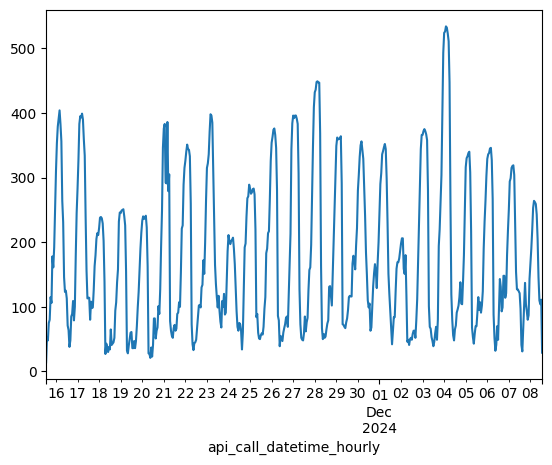

In [34]:
aggregated_df["num_bikes_available"].plot();

In [35]:
first_arima = aggregated_df["num_bikes_available"]

In [36]:
print('p-value: ', adfuller(first_arima))

p-value:  (-3.724134207345737, 0.0037862109439923183, 19, 533, {'1%': -3.442678467240966, '5%': -2.8669778698997543, '10%': -2.5696661916864083}, 5257.8136643057815)


p -value lower than 5 % so no differentiation 

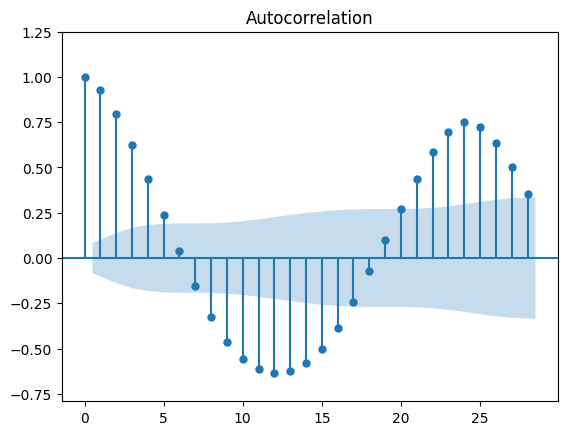

In [37]:
plot_acf(first_arima, auto_ylims=True);

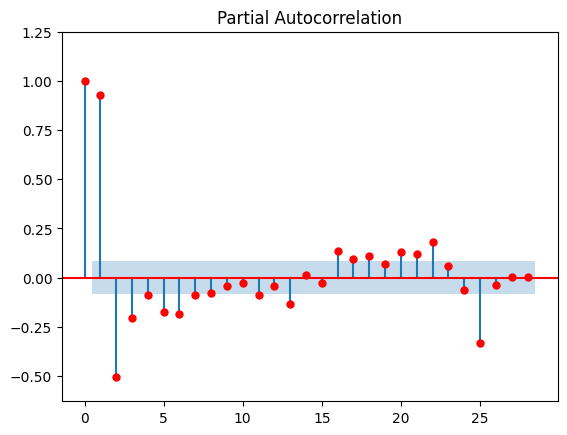

In [38]:
plot_pacf(first_arima, method='ywm', auto_ylims=True, c='r');

In [39]:
y_train = first_arima[:387]
y_test = first_arima[387:]

In [40]:
import pmdarima as pm

model = pm.auto_arima(
    y_train,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    d=None,           # let model determine 'd'
    test='adf',       # using adf test to find optimal 'd'
    trace=True, error_action='ignore',  suppress_warnings=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4788.519, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4014.164, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4400.376, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5252.989, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3906.538, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3886.077, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3858.103, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3859.690, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3858.328, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3925.309, Time=0.15 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 2.459 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  387
M

In [41]:
arima = ARIMA(y_train, order=(3,0,1), trend='t').fit()

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [42]:
print(arima.summary())


                                SARIMAX Results                                
Dep. Variable:     num_bikes_available   No. Observations:                  387
Model:                  ARIMA(3, 0, 1)   Log Likelihood               -1945.744
Date:                 Fri, 17 Jan 2025   AIC                           3903.488
Time:                         02:22:46   BIC                           3927.238
Sample:                     11-15-2024   HQIC                          3912.905
                          - 12-01-2024                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7140      0.109      6.577      0.000       0.501       0.927
ar.L1          1.8454      0.210      8.773      0.000       1.433       2.258
ar.L2         -0.9614      0.303     -3.171 

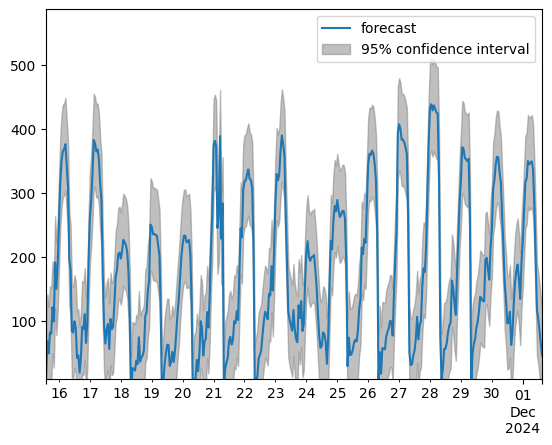

In [43]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(arima, start=1, dynamic=False);
plt.ylim((.7 * first_arima.min(), 1.1 * first_arima.max()));

In [44]:
forecast_results = arima.get_forecast(166, alpha=0.05)
forecast = forecast_results.predicted_mean.reset_index(drop=True)
# forecast = arima.forecast(15, alpha=0.05)
conf_int = pd.DataFrame(forecast_results.conf_int().values, columns=['low', 'high'])

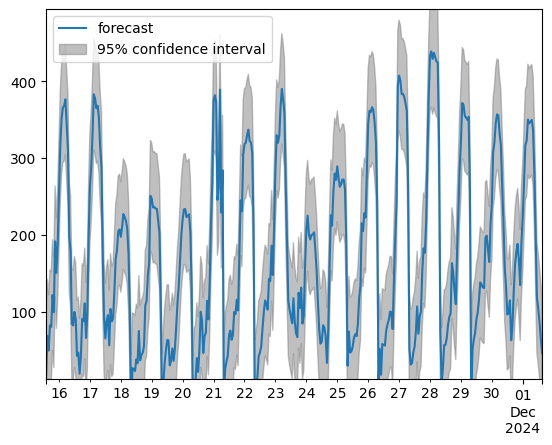

In [45]:
plot_predict(arima, start=1, dynamic=False);
plt.ylim((.9 * y_train.min(), 1.1 * y_train.max()));

In [46]:
conf_int

,low,high
0,12.305531,156.467675
1,-6.642432,229.279208
2,-14.679347,298.537954
3,-14.672046,362.721664
4,-8.613039,420.018811
...,...,...
161,117.995242,665.937442
162,118.709204,666.651404
163,119.423166,667.365366
164,120.137128,668.079328


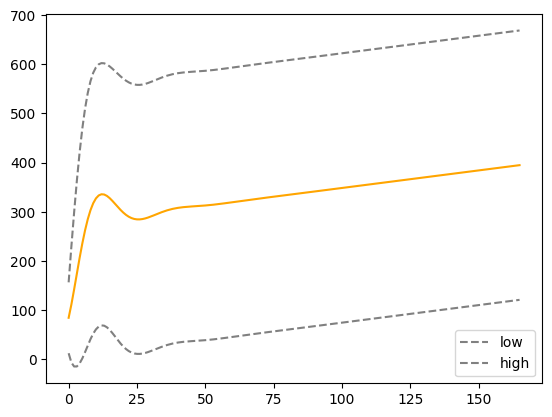

In [47]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend();

In [48]:
forecast

0       84.386603
1      111.318388
2      141.929303
3      174.024809
4      205.702886
          ...    
161    391.966342
162    392.680304
163    393.394266
164    394.108228
165    394.822191
Name: predicted_mean, Length: 166, dtype: float64

In [49]:
from sklearn.metrics import mean_absolute_percentage_error

In [50]:
mse = mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_test, forecast)


In [51]:
mse

41322.50475991726

In [52]:
mae

178.85484366484107

In [53]:
mape

2.119380642426006

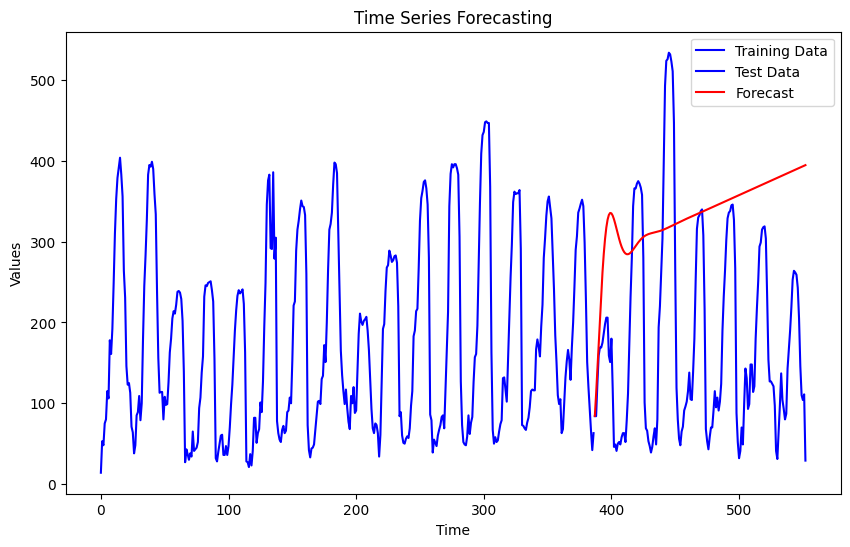

In [54]:
plt.figure(figsize=(10, 6))
# Plot y_train
plt.plot(range(len(y_train)), y_train, label="Training Data", color="blue")
# Plot y_test
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label="Test Data", color="blue")
# Plot forecast
plt.plot(range(len(y_train), len(y_train) + len(forecast)), forecast, label="Forecast", color="red")

# Add labels and legend
plt.title("Time Series Forecasting")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

In [55]:
import pmdarima as pm

model = pm.auto_arima(
    y_train,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    d=None,           # let model determine 'd'
    test='adf',       # using adf test to find optimal 'd'
    trace=True, error_action='ignore',  suppress_warnings=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4788.519, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4014.164, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4400.376, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5252.989, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3906.538, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3886.077, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3858.103, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3859.690, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3858.328, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3925.309, Time=0.15 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 2.510 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  387
M

In [56]:
forecast

0       84.386603
1      111.318388
2      141.929303
3      174.024809
4      205.702886
          ...    
161    391.966342
162    392.680304
163    393.394266
164    394.108228
165    394.822191
Name: predicted_mean, Length: 166, dtype: float64

# Sarima

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(y_train, model='additive')#or multiplicative
result_mul = seasonal_decompose(y_train, model='multiplicative')#or multiplicative


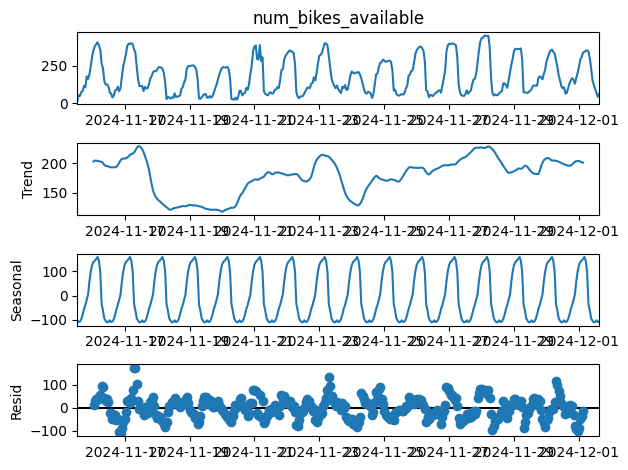

In [58]:
result_add.plot();

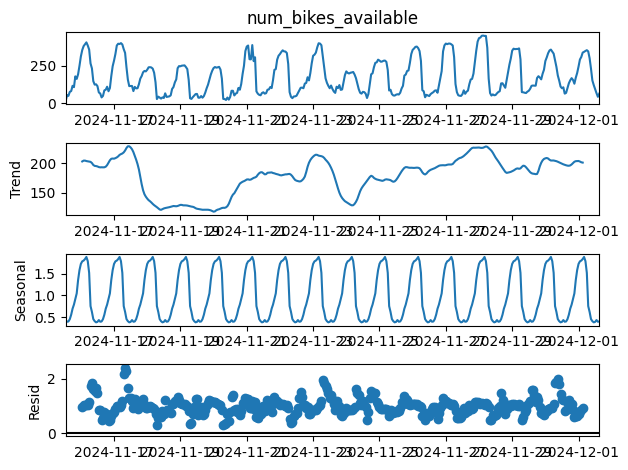

In [59]:
result_mul.plot();

In [60]:
df_deseson_add = (y_train - result_add.seasonal)

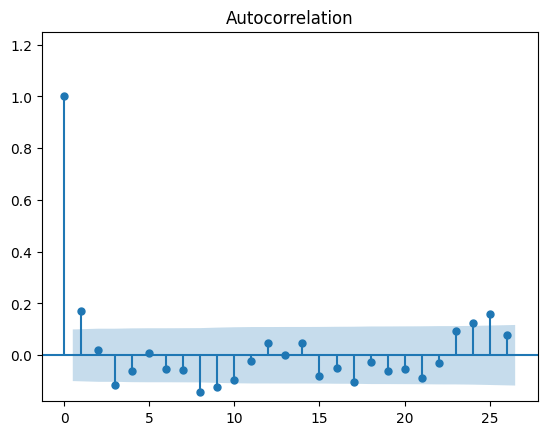

In [61]:
plot_acf(df_deseson_add.diff(1).dropna(), auto_ylims=True);

In [62]:
import numpy as np

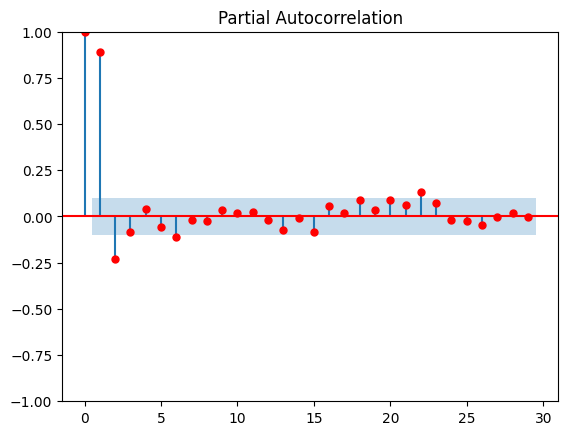

In [63]:
plot_pacf(df_deseson_add.dropna(),lags=np.arange(30), method='ywm',c='red');

### Step 1: Check Stationarity


diff of d = 1, seasonality of 12 due to a peak in the serie, stationary attained a d = 1, 


In [64]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_deseson_add)[1]

1.4312819760974584e-07

The p-value should be less than 0.05 to have a 95% confidence in the stationarity.  

If the p-value is larger than 0.05, we cannot reject the null hypothesis (null hypothesis = "the process is not stationary").

Ideally, p is *much* smaller than 0.05.

Another way to look for stationarity is to look at the autocorrelation function (ACF).

Plot the ACF of the time series. You should see a large peak at lag 12, indicating strong yearly seasonality.

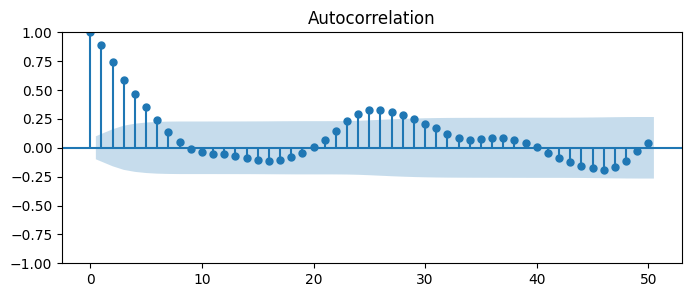

In [65]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_deseson_add, lags=50, ax=ax)
plt.show()

### Step 2 - Seasonal Differencing (D)


In [66]:
adfuller(df_deseson_add.diff(6).dropna())[1]

1.7897079512216825e-15

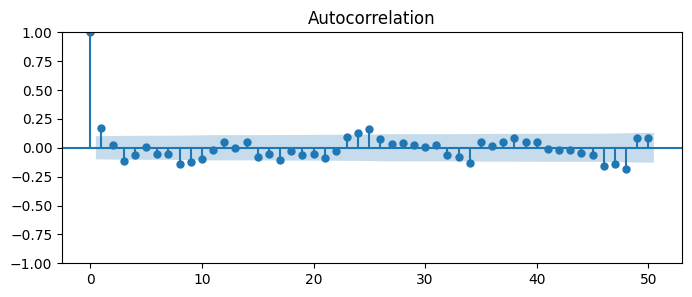

In [67]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_deseson_add.diff(1).dropna(), lags=50, ax=ax)
plt.show()

#### Differencing small d 

In [68]:
adfuller(df_deseson_add.diff(12).diff(1).dropna())[1]

8.731223441932425e-22

#### Step 4 - Select AR(p, P) and MA(q, Q) Terms

You will now use the ACF and PACF plots to decide whether to include an AR term(s), MA term(s), or both.

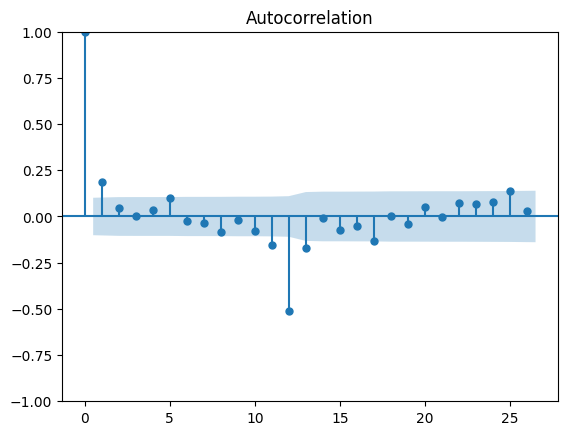

In [69]:
plot_acf(df_deseson_add.diff(12).diff(1).dropna());

#### Partial Auto correlation 

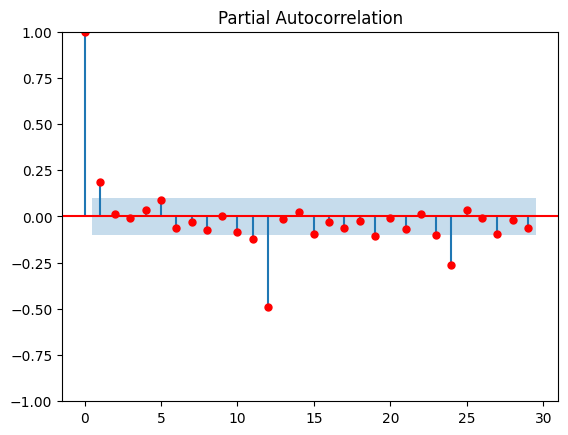

In [70]:
plot_pacf(df_deseson_add.diff(12).diff().dropna(),lags=np.arange(30), method='ywm',c='red');

In [71]:
import pmdarima as pm
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [72]:
# Define SARIMA model with seasonality
model = SARIMAX(
    df_deseson_add,
    order=(1, 0, 2),         # Non-seasonal ARIMA (p, d, q)
    seasonal_order=(2, 1, 0, 24),  # Seasonal ARIMA (P, D, Q, m with m=24 for seasonality)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the SARIMA model
model_fit = model.fit(disp=False)

# Print model summary
print(model_fit.summary())


/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  387
Model:             SARIMAX(1, 0, 2)x(2, 1, [], 24)   Log Likelihood               -1519.609
Date:                             Fri, 17 Jan 2025   AIC                           3051.218
Time:                                     02:23:02   BIC                           3073.714
Sample:                                 11-15-2024   HQIC                          3060.207
                                      - 12-01-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7745      0.045     17.290      0.000       0.687       0.862
ma.L1          0.2112      

In [73]:
# Predict on the training data
train_pred = model_fit.predict(start=df_deseson_add.index[0], end=df_deseson_add.index[-1])

# Forecast on the test data
test_pred = model_fit.get_forecast(steps=len(y_test))

# Extract predicted mean and confidence intervals
test_pred_mean = test_pred.predicted_mean
test_pred_ci = test_pred.conf_int()


In [74]:
test_pred

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_pred_mean)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, test_pred_mean)

# Mean Absolute Percentage Error (MAPE)
# Avoid division by zero by filtering out zero values in y_test
mape = mean_absolute_percentage_error(y_test, test_pred_mean)

# Print the results
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


MSE: 22566.121264904705
MAE: 127.31965250032756
MAPE: 1.263425093986916%


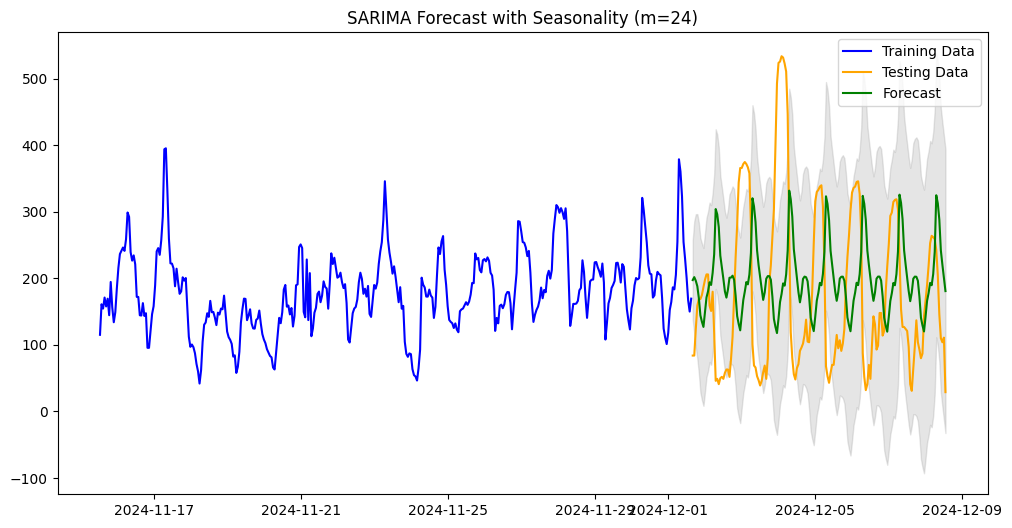

In [76]:
# Plot training predictions, test predictions, and confidence intervals
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(df_deseson_add, label='Training Data', color='blue')

# Plot testing data
plt.plot(y_test, label='Testing Data', color='orange')

# Plot predicted values
plt.plot(y_test.index, test_pred_mean, label='Forecast', color='green')

# Add confidence intervals
plt.fill_between(
    y_test.index,
    test_pred_ci.iloc[:, 0],
    test_pred_ci.iloc[:, 1],
    color='gray',
    alpha=0.2
)

plt.legend()
plt.title('SARIMA Forecast with Seasonality (m=24)')
plt.show()


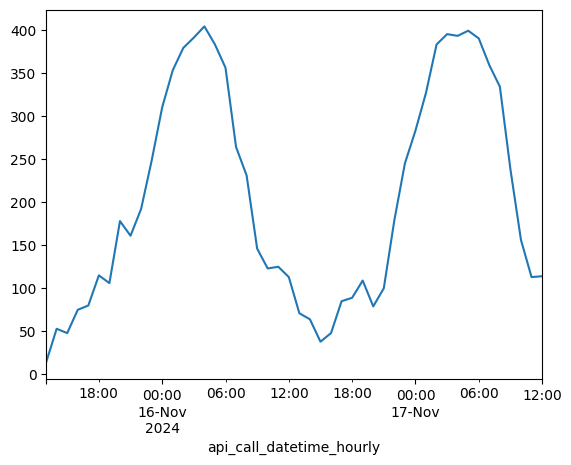

In [77]:
first_arima.head(48).plot();

## Sarimax exogoneous data 

In [112]:
first_arima


api_call_datetime_hourly
2024-11-15 13:00:00     14
2024-11-15 14:00:00     53
2024-11-15 15:00:00     48
2024-11-15 16:00:00     75
2024-11-15 17:00:00     80
                      ... 
2024-12-08 09:00:00    146
2024-12-08 10:00:00    110
2024-12-08 11:00:00    104
2024-12-08 12:00:00    111
2024-12-08 13:00:00     29
Name: num_bikes_available, Length: 553, dtype: int64

In [113]:
aggregated_df["% velib bleu"] = aggregated_df["num_bikes_available_ebike"]/aggregated_df["num_bikes_available"]

In [114]:
aggregated_df["% velib bleu"]

api_call_datetime_hourly
2024-11-15 13:00:00    0.642857
2024-11-15 14:00:00    0.716981
2024-11-15 15:00:00    0.687500
2024-11-15 16:00:00    0.613333
2024-11-15 17:00:00    0.537500
                         ...   
2024-12-08 09:00:00    0.678082
2024-12-08 10:00:00    0.700000
2024-12-08 11:00:00    0.625000
2024-12-08 12:00:00    0.603604
2024-12-08 13:00:00    0.586207
Name: % velib bleu, Length: 553, dtype: float64

In [115]:
y_train_sarimax = aggregated_df[:387][["% velib bleu","is_week_end"]]
y_test_sarimax = aggregated_df[387:][["% velib bleu","is_week_end"]]
y_train_sarimax

,% velib bleu,is_week_end
api_call_datetime_hourly,,
2024-11-15 13:00:00,0.642857,0
2024-11-15 14:00:00,0.716981,0
2024-11-15 15:00:00,0.687500,0
2024-11-15 16:00:00,0.613333,0
2024-11-15 17:00:00,0.537500,0
...,...,...
2024-12-01 11:00:00,0.625000,1
2024-12-01 12:00:00,0.709677,1
2024-12-01 13:00:00,0.848485,1


In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [117]:
df_3 =  pd.read_csv("bikes_weather.csv")
df_2 = pd.read_csv("Paris_weather_data.csv")
# Convert the datetime column in the first dataset to datetime if not already
df_2['datetime'] = pd.to_datetime(df_2['datetime'])

# Ensure the second dataset has datetime as the index
first_arima.index = pd.to_datetime(first_arima.index)


In [118]:
ts = pd.DataFrame(first_arima)

In [119]:
ts

,num_bikes_available
api_call_datetime_hourly,
2024-11-15 13:00:00,14
2024-11-15 14:00:00,53
2024-11-15 15:00:00,48
2024-11-15 16:00:00,75
2024-11-15 17:00:00,80
...,...
2024-12-08 09:00:00,146
2024-12-08 10:00:00,110
2024-12-08 11:00:00,104


In [120]:
df_2

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,paris,2024-11-15 00:00:00,50.7,50.7,48.0,90.29,0.000,0,NaN,0.0,...,1029.5,99.0,6.3,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
1,paris,2024-11-15 01:00:00,50.7,50.7,47.1,87.44,0.000,0,NaN,0.0,...,1029.3,99.0,6.8,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
2,paris,2024-11-15 02:00:00,50.3,50.3,46.6,87.19,0.000,0,NaN,0.0,...,1028.9,99.0,9.3,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
3,paris,2024-11-15 03:00:00,50.0,47.4,46.1,86.50,0.000,0,NaN,0.0,...,1028.9,99.0,10.6,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
4,paris,2024-11-15 04:00:00,49.2,47.2,43.7,81.35,0.000,0,NaN,0.0,...,1028.6,99.0,13.4,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,paris,2024-12-08 19:00:00,44.9,38.5,42.5,91.06,0.003,100,rain,0.0,...,1012.1,97.6,6.6,0,0.0,0,NaN,"Rain, Overcast",rain,"07149099999,07156099999,07146099999,0715709999..."
572,paris,2024-12-08 20:00:00,44.9,39.3,42.8,92.03,0.000,0,NaN,0.0,...,1013.3,100.0,4.8,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
573,paris,2024-12-08 21:00:00,44.9,39.0,42.4,90.67,0.000,0,NaN,0.0,...,1014.4,95.5,7.7,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
574,paris,2024-12-08 22:00:00,44.2,38.1,41.2,89.43,0.000,0,NaN,0.0,...,1015.6,100.0,8.3,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."


In [121]:
# Convert the datetime column in the first dataset to datetime if not already
df_2['datetime'] = pd.to_datetime(df_2['datetime'])
df_2.set_index('datetime', inplace=True)

# Ensure the second dataset has datetime as the index
first_arima.index = pd.to_datetime(first_arima.index)

# Check for timezone consistency (if applicable)

# Merge the datasets on datetime
merged_df_train_seasonalized = ts.merge(df_2[['precip', 'temp', 'snow', 'feelslike', 'windgust']],
                            how='left',
                            left_index=True,
                            right_index=True)

# Check the result

# Merge the datasets on datetime
merged_df_train = pd.DataFrame(df_deseson_add,columns=["velo"]).merge(df_2[['precip', 'temp', 'snow', 'feelslike', 'windgust']],
                            how='left',
                            left_index=True,
                            right_index=True)

# Check the result

new_sarimax_train = merged_df_train["velo"]
new_exo_train = merged_df_train.drop("velo",axis=1)



new_sarimax_seso_train = merged_df_train_seasonalized["num_bikes_available"]
new_exo_train_seso = merged_df_train_seasonalized.drop("num_bikes_available",axis=1)


sarimax_train_exo = new_exo_train.merge(y_train_sarimax, left_index=True, right_index=True)

In [122]:
merged_df_train_seasonalized

,num_bikes_available,precip,temp,snow,feelslike,windgust
api_call_datetime_hourly,,,,,,
2024-11-15 13:00:00,14,0.000,50.6,0.0,50.6,9.8
2024-11-15 14:00:00,53,0.000,51.0,0.0,51.0,8.7
2024-11-15 15:00:00,48,0.000,50.7,0.0,50.7,10.4
2024-11-15 16:00:00,75,0.000,49.9,0.0,49.9,8.3
2024-11-15 17:00:00,80,0.000,49.1,0.0,49.1,7.2
...,...,...,...,...,...,...
2024-12-08 09:00:00,146,0.008,46.4,0.0,39.6,38.3
2024-12-08 10:00:00,110,0.000,46.3,0.0,38.8,33.6
2024-12-08 11:00:00,104,0.039,46.4,0.0,39.8,33.9


In [123]:

serie_sarimax = merged_df_train_seasonalized["num_bikes_available"]
exo_sarimax = merged_df_train_seasonalized.drop("num_bikes_available",axis =1)
y_train_sarimax = serie_sarimax[:387]
y_test_sarimax = serie_sarimax[387:]
exo_train = merged_df_train_seasonalized.drop("num_bikes_available",axis =1)[:387]
exo_test = merged_df_train_seasonalized.drop("num_bikes_available",axis =1)[387:]

In [124]:
merged_df_train_seasonalized.to_csv("df_lstm_ts.csv")

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Define the split index
split_index = 387

# Target variable split
y_train = serie_sarimax[:split_index]
y_test = serie_sarimax[split_index:]

# Exogenous variable split
exo_train = merged_df_train_seasonalized.drop("num_bikes_available", axis=1)[:split_index]
exo_test = merged_df_train_seasonalized.drop("num_bikes_available", axis=1)[split_index:]

# Define parameter ranges for grid search
p = range(0, 3)  # AR terms
d = range(0, 2)  # Differencing
q = range(0, 3)  # MA terms
P = range(0, 5)  # Seasonal AR terms
D = range(0, 2)  # Seasonal differencing
Q = range(0, 3)  # Seasonal MA terms
m = [24, 12, 2]         # Seasonal period (hourly data, daily seasonality)

# Generate all possible parameter combinations
param_combinations = list(itertools.product(p, d, q, P, D, Q, m))

# Initialize variables to store the best model and score
best_aic = float('inf')
best_params = None

# Grid search with progress tracking
print(f"Starting grid search over {len(param_combinations)} parameter combinations...")
for i, params in enumerate(param_combinations):
    try:
        # Define and fit the SARIMAX model
        model = SARIMAX(
            y_train,
            exog=exo_train,
            order=(params[0], params[1], params[2]),
            seasonal_order=(params[3], params[4], params[5], params[6]),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit(disp=False)

        # Check AIC and update the best model if necessary
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = params

        # Print progress
        print(f"Iteration {i+1}/{len(param_combinations)}: Params={params}, AIC={model_fit.aic:.2f}")
    except Exception as e:
        print(f"Iteration {i+1}/{len(param_combinations)} failed with params={params}. Error: {e}")

print(f"Best model: {best_params} with AIC: {best_aic:.2f}")


Starting grid search over 1620 parameter combinations...
Iteration 1/1620: Params=(0, 0, 0, 0, 0, 0, 24), AIC=4770.38
Iteration 2/1620: Params=(0, 0, 0, 0, 0, 0, 12), AIC=4770.38
Iteration 3/1620: Params=(0, 0, 0, 0, 0, 0, 2), AIC=4770.38
Iteration 4/1620: Params=(0, 0, 0, 0, 0, 1, 24), AIC=4322.37
Iteration 5/1620: Params=(0, 0, 0, 0, 0, 1, 12), AIC=4534.94
Iteration 6/1620: Params=(0, 0, 0, 0, 0, 1, 2), AIC=4467.92


KeyboardInterrupt: 

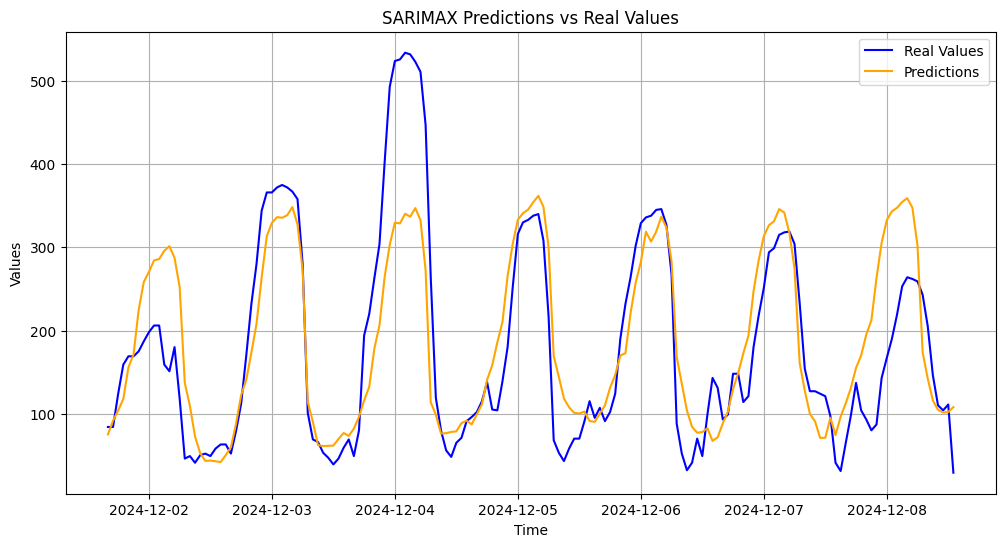

In [ ]:
sarimax_model = SARIMAX(y_train_sarimax,
                        exog=exo_train,
                        order=(2, 1, 2),
                        seasonal_order=(4, 1, 2, 24))

# Fitting the model
sarimax_fitted = sarimax_model.fit(disp=False)

# Making predictions on the test set
predictions = sarimax_fitted.predict(start=387, end=len(serie_sarimax)-1, exog=exo_test)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_sarimax.index, y_test_sarimax, label="Real Values", color="blue")
plt.plot(y_test_sarimax.index, predictions, label="Predictions", color="orange")
plt.title("SARIMAX Predictions vs Real Values")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming y_test_sarimax contains the real values and predictions contains the predicted values
mae = mean_absolute_error(y_test_sarimax, predictions)
mse = mean_squared_error(y_test_sarimax, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}%")


MAE: 52.094826983581854
MSE: 5162.128709523735
MAPE: 1.263425093986916%


In [94]:
best_params, best_aic

((0, 0, 0, 0, 0, 1, 24), 4322.368528069786)

In [95]:
mape = mean_absolute_percentage_error(y_test_sarimax, predictions) * 100


Model using de-seasonalized df 

In [96]:
# Define the SARIMAX model
model = SARIMAX(
    df_deseson_add,
    exog=exo_train,  # Include exogenous variables if applicable; set to None if no exogenous variables
    order=(1, 1, 2),           # Non-seasonal ARIMA (p, d, q)
    seasonal_order=(2, 1, 2, 24),  # Seasonal ARIMA (P, D, Q, m with m=24)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
model_fit = model.fit(disp=False)

# Print model summary
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  387
Model:             SARIMAX(1, 1, 2)x(2, 1, 2, 24)   Log Likelihood               -1477.204
Date:                            Fri, 17 Jan 2025   AIC                           2980.408
Time:                                    02:30:32   BIC                           3029.025
Sample:                                11-15-2024   HQIC                          2999.841
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
precip       121.0744    170.637      0.710      0.478    -213.368     455.516
temp           1.4657      2.136   

In [97]:
# Predict on the training data
train_pred = model_fit.predict(start=df_deseson_add.index[0], end=df_deseson_add.index[-1], exog=exo_train)

# Forecast on the test data
test_pred = model_fit.get_forecast(steps=len(y_test), exog=exo_test)

# Extract predicted mean and confidence intervals
test_pred_mean = test_pred.predicted_mean
test_pred_ci = test_pred.conf_int()


In [98]:
# Evaluate on test set
test_mse = mean_squared_error(y_test, test_pred_mean)
test_mae = mean_absolute_error(y_test, test_pred_mean)
test_mape = mean_absolute_percentage_error(y_test, test_pred_mean)

print(f"Test MSE: {test_mse:.2f}, Test MAE: {test_mae:.2f}")


Test MSE: 17539.03, Test MAE: 114.54


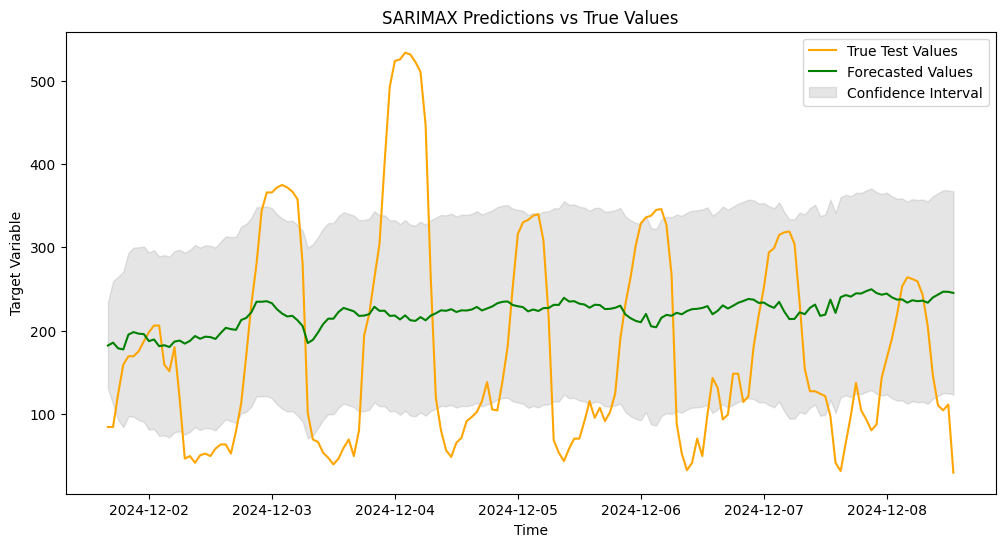

In [99]:
plt.figure(figsize=(12, 6))

# Plot true values
plt.plot(y_test, label='True Test Values', color='orange')

# Plot predicted values
plt.plot(test_pred_mean, label='Forecasted Values', color='green')

# Add confidence intervals
plt.fill_between(
    y_test.index,
    test_pred_ci.iloc[:, 0],  # Lower bound
    test_pred_ci.iloc[:, 1],  # Upper bound
    color='gray',
    alpha=0.2,
    label='Confidence Interval'
)

plt.title('SARIMAX Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define a simpler SARIMA model
model = SARIMAX(
    df_deseson_add,
    exog=y_train_sarimax,  # Include if you have exogenous variables
    order=(1, 1, 1),           # Simpler non-seasonal (p, d, q)
    seasonal_order=(1, 1, 1, 24),  # Simpler seasonal (P, D, Q, m)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
model_fit = model.fit(disp=False)

# Evaluate on test set
test_pred = model_fit.get_forecast(steps=len(y_test), exog=y_test_sarimax)
test_pred_mean = test_pred.predicted_mean

# Calculate MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
test_mae = mean_absolute_error(y_test, test_pred_mean)
test_mse = mean_squared_error(y_test, test_pred_mean)

print(f"Test MAE: {test_mae}, Test MSE: {test_mse}")


Test MAE: 92.4372905685241, Test MSE: 10238.08052343395


In [101]:
len(df["station_id"].unique())

1488

In [102]:
# Merge the datasets on datetime
merged_df_train_seasonalized = pd.DataFrame(first_arima,columns=["velo"]).merge(df_2[['precip', 'temp', 'snow', 'feelslike', 'windgust']],
                            how='left',
                            left_index=True,
                            right_index=True)

# Check the result
print(merged_df_train.head())

                                velo  precip  temp  snow  feelslike  windgust
api_call_datetime_hourly                                                     
2024-11-15 13:00:00       115.209006     0.0  50.6   0.0       50.6       9.8
2024-11-15 14:00:00       161.154839     0.0  51.0   0.0       51.0       8.7
2024-11-15 15:00:00       154.578451     0.0  50.7   0.0       50.7      10.4
2024-11-15 16:00:00       171.214562     0.0  49.9   0.0       49.9       8.3
2024-11-15 17:00:00       157.810395     0.0  49.1   0.0       49.1       7.2


In [103]:
# Merge the datasets on datetime
merged_df_train = pd.DataFrame(df_deseson_add,columns=["velo"]).merge(df_2[['precip', 'temp', 'snow', 'feelslike', 'windgust']],
                            how='left',
                            left_index=True,
                            right_index=True)

# Check the result
print(merged_df_train.head())


                                velo  precip  temp  snow  feelslike  windgust
api_call_datetime_hourly                                                     
2024-11-15 13:00:00       115.209006     0.0  50.6   0.0       50.6       9.8
2024-11-15 14:00:00       161.154839     0.0  51.0   0.0       51.0       8.7
2024-11-15 15:00:00       154.578451     0.0  50.7   0.0       50.7      10.4
2024-11-15 16:00:00       171.214562     0.0  49.9   0.0       49.9       8.3
2024-11-15 17:00:00       157.810395     0.0  49.1   0.0       49.1       7.2


In [104]:
merged_df_train.columns

Index(['velo', 'precip', 'temp', 'snow', 'feelslike', 'windgust'], dtype='object')

In [105]:
new_sarimax_train = merged_df_train["velo"]
new_exo_train = merged_df_train.drop("velo",axis=1)

In [106]:
sarimax_train_exo = new_exo_train.merge(y_train_sarimax, left_index=True, right_index=True)

## Model With one time series  -- Example of result 

In [107]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(hourly_data_15112)[1])

NameError: name 'hourly_data_15112' is not defined

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(hourly_data_15112, auto_ylims=True);


In [ ]:
print('p-value: ', adfuller(hourly_data_15112.diff(1).fillna(0))[1])

In [ ]:
hourly_data_15112.diff(1).fillna(0).plot()

In [ ]:
plot_acf(hourly_data_15112.diff().dropna(), auto_ylims=True);

## AR and MA (p and q) 

q = 5 

In [ ]:
plot_pacf(hourly_data_15112, method='ywm', auto_ylims=True, c='r');

p = 1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1. initialize the model
arima = ARIMA(hourly_data_15112, order=(1, 0, 3), trend='t')

# 2. fit the models
arima = arima.fit()

arima.summary()

In [ ]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend();

In [ ]:
forecast.index = y_test.index
conf_int.index = y_test.index

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='orange', ls='--')
plt.plot(conf_int['high'], label='high', c='orange', ls='--')
plt.plot(y_train, c='blue')
plt.plot(y_test, c='blue')

plt.legend()
plt.fill_between(y_test.index, conf_int['low'], conf_int['high'], color='k', alpha=.15);

In [ ]:
hourly_data_15112

In [ ]:
residuals = pd.DataFrame(arima.resid)
residuals.plot(title="Residuals");

In [ ]:
residuals.plot(kind='kde', title='Residual density');

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for p in range(0, 4):
    for q in range(0, 4):
        try:
            model = ARIMA(y_train, order=(p, 1, q)).fit()
            print(f"Model ({p}, 1, {q}) - AIC: {model.aic}")
        except:
            print(f"Model ({p}, 1, {q}) failed.")


# Prophet 

<AxesSubplot:xlabel='api_call_datetime_hourly'>

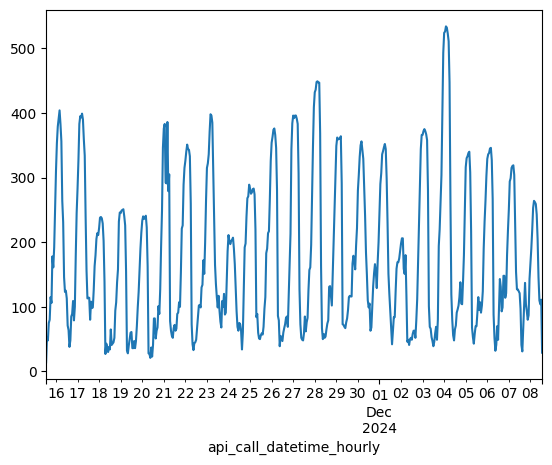

In [130]:
first_arima.plot()

In [134]:
! pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/1f/47/f7d10a904756830efd8522700e582822ff44a15f839b464044ee4c53ee36/prophet-1.1.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/a1/bd/36a4e4dd5d6cb48f75b6673b499ac80764693bd0c8515030a29aafc63161/holidays-0.64-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed08e046a4a9b10177fa3/stanio-0.5.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 68.4 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [136]:
prophet_format = pd.DataFrame(first_arima).reset_index()

In [137]:
prophet_format

,api_call_datetime_hourly,num_bikes_available
0,2024-11-15 13:00:00,14
1,2024-11-15 14:00:00,53
2,2024-11-15 15:00:00,48
3,2024-11-15 16:00:00,75
4,2024-11-15 17:00:00,80
...,...,...
548,2024-12-08 09:00:00,146
549,2024-12-08 10:00:00,110
550,2024-12-08 11:00:00,104
551,2024-12-08 12:00:00,111


In [138]:
prophet_format.columns = ["ds","y"]

In [139]:
prophet = Prophet(seasonality_mode='additive')


In [140]:
train_size = 0.7
index = round(train_size*prophet_format.shape[0])

df_train = prophet_format.iloc[:index]
df_test = prophet_format.iloc[index:]

In [141]:
prophet.fit(df_train)

01:37:52 - cmdstanpy - INFO - Chain [1] start processing
01:37:52 - cmdstanpy - INFO - Chain [1] done processing


In [142]:
future = prophet.make_future_dataframe(periods=166,freq="H")

In [143]:
forecast = prophet.predict(future)

In [144]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-11-15 13:00:00,160.700692,-13.379291,123.808593,160.700692,160.700692,-106.508117,-106.508117,-106.508117,-110.000777,-110.000777,-110.000777,3.492660,3.492660,3.492660,0.0,0.0,0.0,54.192575
1,2024-11-15 14:00:00,160.764754,-24.775201,116.404659,160.764754,160.764754,-112.643272,-112.643272,-112.643272,-117.004845,-117.004845,-117.004845,4.361573,4.361573,4.361573,0.0,0.0,0.0,48.121482
2,2024-11-15 15:00:00,160.828816,-17.541564,125.014733,160.828816,160.828816,-106.864092,-106.864092,-106.864092,-112.172871,-112.172871,-112.172871,5.308780,5.308780,5.308780,0.0,0.0,0.0,53.964725
3,2024-11-15 16:00:00,160.892878,-3.243932,145.703762,160.892878,160.892878,-88.599858,-88.599858,-88.599858,-94.923449,-94.923449,-94.923449,6.323590,6.323590,6.323590,0.0,0.0,0.0,72.293020
4,2024-11-15 17:00:00,160.956940,24.406352,162.360078,160.956940,160.956940,-66.948235,-66.948235,-66.948235,-74.342782,-74.342782,-74.342782,7.394547,7.394547,7.394547,0.0,0.0,0.0,94.008705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2024-12-08 09:00:00,220.808160,57.782268,198.510538,219.493083,221.971549,-93.362718,-93.362718,-93.362718,-95.928751,-95.928751,-95.928751,2.566034,2.566034,2.566034,0.0,0.0,0.0,127.445442
549,2024-12-08 10:00:00,220.931639,43.782943,190.934757,219.603371,222.110149,-103.921659,-103.921659,-103.921659,-105.335234,-105.335234,-105.335234,1.413576,1.413576,1.413576,0.0,0.0,0.0,117.009980
550,2024-12-08 11:00:00,221.055118,47.010835,188.631944,219.710766,222.248410,-101.297582,-101.297582,-101.297582,-101.603723,-101.603723,-101.603723,0.306141,0.306141,0.306141,0.0,0.0,0.0,119.757536
551,2024-12-08 12:00:00,221.178597,51.858620,191.895439,219.819190,222.386466,-102.536707,-102.536707,-102.536707,-101.785404,-101.785404,-101.785404,-0.751303,-0.751303,-0.751303,0.0,0.0,0.0,118.641890


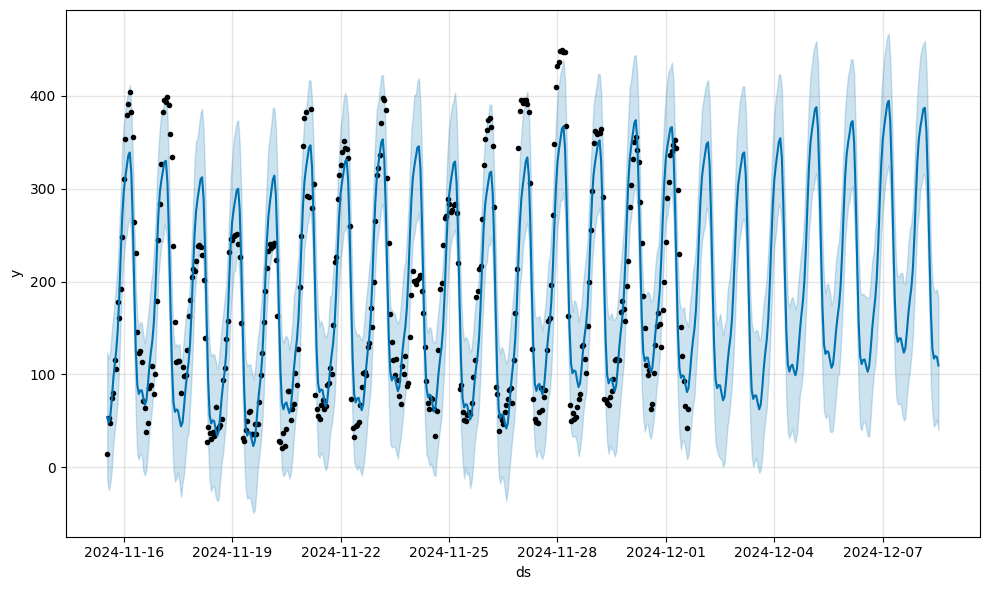

In [145]:
prophet.plot(forecast);

In [146]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

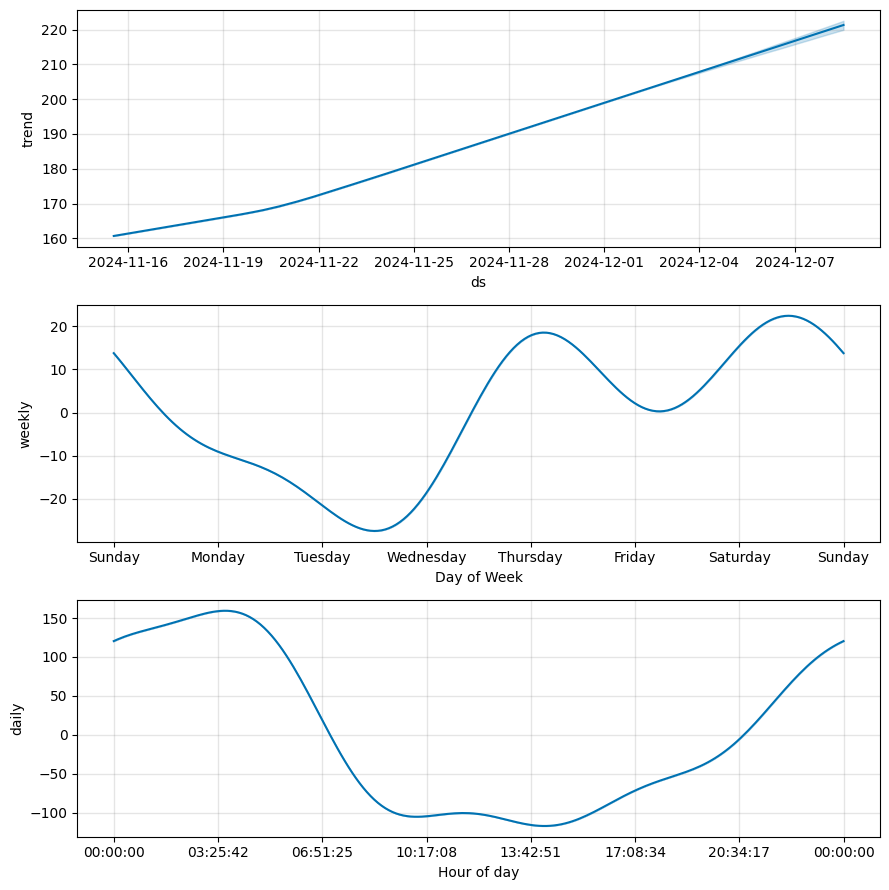

In [147]:
fig = prophet.plot_components(forecast)

In [148]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-11-15 13:00:00,160.700692,-13.379291,123.808593,160.700692,160.700692,-106.508117,-106.508117,-106.508117,-110.000777,-110.000777,-110.000777,3.492660,3.492660,3.492660,0.0,0.0,0.0,54.192575
1,2024-11-15 14:00:00,160.764754,-24.775201,116.404659,160.764754,160.764754,-112.643272,-112.643272,-112.643272,-117.004845,-117.004845,-117.004845,4.361573,4.361573,4.361573,0.0,0.0,0.0,48.121482
2,2024-11-15 15:00:00,160.828816,-17.541564,125.014733,160.828816,160.828816,-106.864092,-106.864092,-106.864092,-112.172871,-112.172871,-112.172871,5.308780,5.308780,5.308780,0.0,0.0,0.0,53.964725
3,2024-11-15 16:00:00,160.892878,-3.243932,145.703762,160.892878,160.892878,-88.599858,-88.599858,-88.599858,-94.923449,-94.923449,-94.923449,6.323590,6.323590,6.323590,0.0,0.0,0.0,72.293020
4,2024-11-15 17:00:00,160.956940,24.406352,162.360078,160.956940,160.956940,-66.948235,-66.948235,-66.948235,-74.342782,-74.342782,-74.342782,7.394547,7.394547,7.394547,0.0,0.0,0.0,94.008705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2024-12-08 09:00:00,220.808160,57.782268,198.510538,219.493083,221.971549,-93.362718,-93.362718,-93.362718,-95.928751,-95.928751,-95.928751,2.566034,2.566034,2.566034,0.0,0.0,0.0,127.445442
549,2024-12-08 10:00:00,220.931639,43.782943,190.934757,219.603371,222.110149,-103.921659,-103.921659,-103.921659,-105.335234,-105.335234,-105.335234,1.413576,1.413576,1.413576,0.0,0.0,0.0,117.009980
550,2024-12-08 11:00:00,221.055118,47.010835,188.631944,219.710766,222.248410,-101.297582,-101.297582,-101.297582,-101.603723,-101.603723,-101.603723,0.306141,0.306141,0.306141,0.0,0.0,0.0,119.757536
551,2024-12-08 12:00:00,221.178597,51.858620,191.895439,219.819190,222.386466,-102.536707,-102.536707,-102.536707,-101.785404,-101.785404,-101.785404,-0.751303,-0.751303,-0.751303,0.0,0.0,0.0,118.641890


In [175]:
df_test

,ds,y,precip,temp,snow,feelslike,windgust,is_weekend
387,2024-12-01 16:00:00,84,0.000000,0.506173,0.0,0.570439,0.351351,1
388,2024-12-01 17:00:00,84,0.000000,0.543210,0.0,0.609700,0.316953,1
389,2024-12-01 18:00:00,124,0.000000,0.561728,0.0,0.628176,0.289926,1
390,2024-12-01 19:00:00,159,0.000000,0.561728,0.0,0.672055,0.285012,1
391,2024-12-01 20:00:00,169,0.000000,0.524691,0.0,0.581986,0.250614,1
...,...,...,...,...,...,...,...,...
548,2024-12-08 09:00:00,146,0.052980,0.490741,0.0,0.461894,0.857494,1
549,2024-12-08 10:00:00,110,0.000000,0.487654,0.0,0.443418,0.742015,1
550,2024-12-08 11:00:00,104,0.258278,0.490741,0.0,0.466513,0.749386,1
551,2024-12-08 12:00:00,111,0.132450,0.490741,0.0,0.457275,0.746929,1


In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming `df` is your original dataset with actual values
# And `model` is your trained Prophet model

# Generate the forecast
future = prophet.make_future_dataframe(periods=len(df_test))  # Adjust to your test set size
forecast = prophet.predict(future)

# Merge actual values (real data) with forecasted values
results = prophet_format.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

In [151]:
# Assuming `results['y']` contains actual values and `results['yhat']` contains forecasted values

# Calculate MAE
mae = mean_absolute_error(results['y'], results['yhat'])
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate MSE
mse = mean_squared_error(results['y'], results['yhat'])
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Absolute Error (MAE): 42.37
Mean Squared Error (MSE): 3090.34


In [152]:
# Calculate RMSE
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 55.59


In [ ]:
results

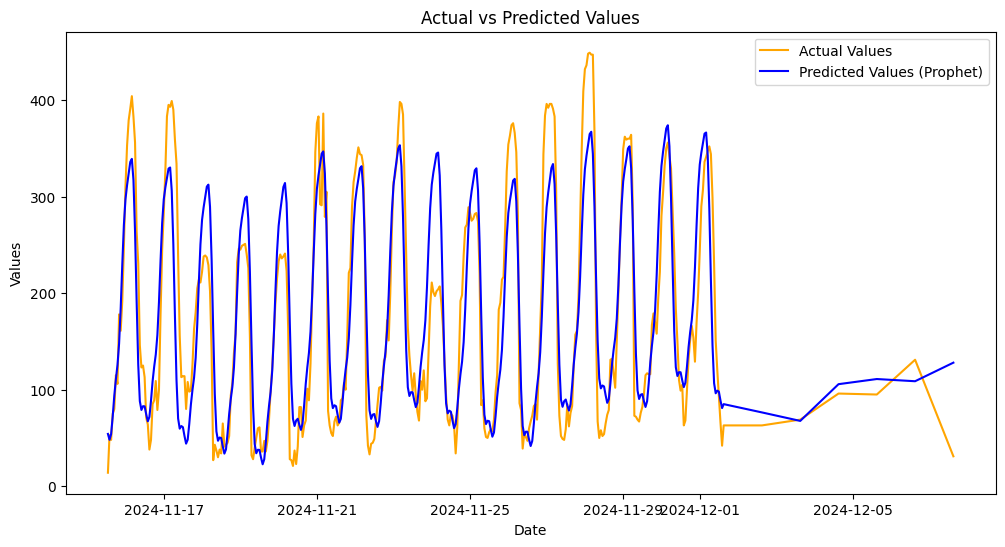

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['y'], label='Actual Values', color='orange')
plt.plot(results['ds'], results['yhat'], label='Predicted Values (Prophet)', color='blue')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()


In [156]:

# Merge actual values with forecast
results = prophet_format.merge(forecast[['ds', 'yhat']], on='ds', how='inner')


                   ds   y       yhat
0 2024-11-15 13:00:00  14  54.192575
1 2024-11-15 14:00:00  53  48.121482
2 2024-11-15 15:00:00  48  53.964725
3 2024-11-15 16:00:00  75  72.293020
4 2024-11-15 17:00:00  80  94.008705


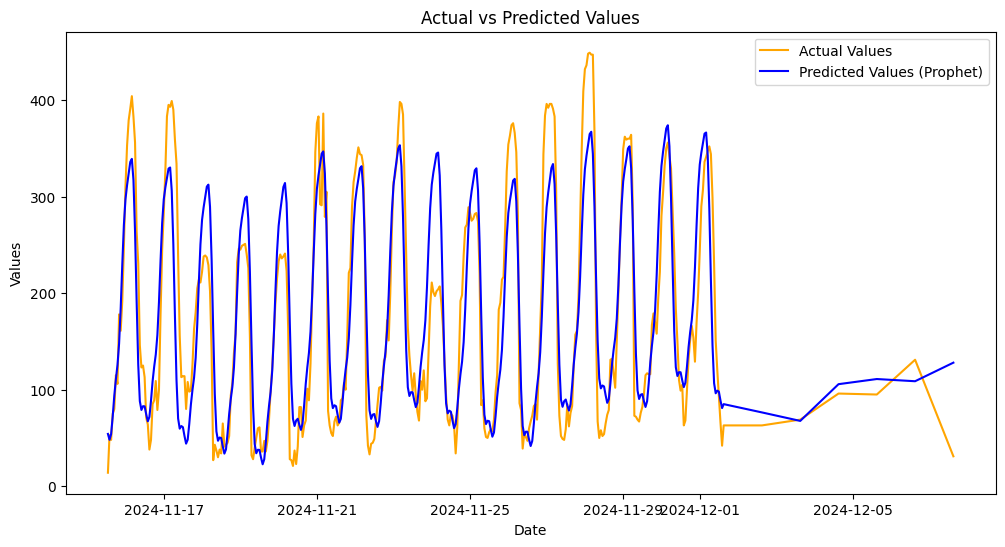

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(results['ds'], results['y'], label='Actual Values', color='orange')

# Plot predicted (Prophet forecast) values
plt.plot(results['ds'], results['yhat'], label='Predicted Values (Prophet)', color='blue')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Display the plot
plt.show()


In [158]:
# Assuming 'results' contains the following columns:
# 'ds' (datetime), 'y' (actual values), 'yhat' (predicted values)

print(results[['ds', 'y', 'yhat']].head())


                   ds   y       yhat
0 2024-11-15 13:00:00  14  54.192575
1 2024-11-15 14:00:00  53  48.121482
2 2024-11-15 15:00:00  48  53.964725
3 2024-11-15 16:00:00  75  72.293020
4 2024-11-15 17:00:00  80  94.008705


In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(results['y'], results['yhat'])
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(results['y'], results['yhat'])
print(f"Mean Absolute Error (MAE): {mae:.2f}")


mape = mean_absolute_percentage_error(results['y'], results['yhat'])
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 3090.34
Mean Absolute Error (MAE): 42.37
Mean Absolute Error (MAE): 42.37


# Prophet with exogenous data

In [160]:
aggregated_df

,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_weekend,is_week_end,% velib bleu
api_call_datetime_hourly,,,,,,,
2024-11-15 13:00:00,14,5.0,9.0,175,0,0,0.642857
2024-11-15 14:00:00,53,15.0,38.0,702,0,0,0.716981
2024-11-15 15:00:00,48,15.0,33.0,704,0,0,0.687500
2024-11-15 16:00:00,75,29.0,46.0,677,0,0,0.613333
2024-11-15 17:00:00,80,37.0,43.0,481,0,0,0.537500
...,...,...,...,...,...,...,...
2024-12-08 09:00:00,146,47.0,99.0,598,28,1,0.678082
2024-12-08 10:00:00,110,33.0,77.0,634,28,1,0.700000
2024-12-08 11:00:00,104,39.0,65.0,640,28,1,0.625000


In [161]:
df_weather_prophet = df_2[['precip', 'temp', 'snow', 'feelslike', 'windgust']]

In [162]:
prophet_format = pd.DataFrame(first_arima).reset_index()

In [163]:
df_weather_prophet

,precip,temp,snow,feelslike,windgust
datetime,,,,,
2024-11-15 00:00:00,0.000,50.7,0.0,50.7,12.8
2024-11-15 01:00:00,0.000,50.7,0.0,50.7,16.5
2024-11-15 02:00:00,0.000,50.3,0.0,50.3,13.7
2024-11-15 03:00:00,0.000,50.0,0.0,47.4,12.7
2024-11-15 04:00:00,0.000,49.2,0.0,47.2,13.7
...,...,...,...,...,...
2024-12-08 19:00:00,0.003,44.9,0.0,38.5,29.1
2024-12-08 20:00:00,0.000,44.9,0.0,39.3,27.1
2024-12-08 21:00:00,0.000,44.9,0.0,39.0,25.7


In [164]:
prophet_format

,api_call_datetime_hourly,num_bikes_available
0,2024-11-15 13:00:00,14
1,2024-11-15 14:00:00,53
2,2024-11-15 15:00:00,48
3,2024-11-15 16:00:00,75
4,2024-11-15 17:00:00,80
...,...,...
548,2024-12-08 09:00:00,146
549,2024-12-08 10:00:00,110
550,2024-12-08 11:00:00,104
551,2024-12-08 12:00:00,111


In [165]:
# Ensure datetime formats
prophet_format['api_call_datetime_hourly'] = pd.to_datetime(prophet_format['api_call_datetime_hourly'])
df_weather_prophet.index = pd.to_datetime(df_weather_prophet.index)

# Reset the index of df2 for merging
df_weather_prophet = df_weather_prophet.reset_index()

# Merge the DataFrames on the datetime column
merged_df = pd.merge(
    prophet_format,
    df_weather_prophet,
    left_on='api_call_datetime_hourly',  # Column from df1
    right_on='datetime',                 # Column from df2
    how='inner'                          # Use 'inner' join to match exact datetime rows
)

# Drop redundant datetime column if needed
merged_df = merged_df.drop(columns=['datetime'])

# Display the result
print(merged_df.head())


  api_call_datetime_hourly  num_bikes_available  precip  temp  snow  \
0      2024-11-15 13:00:00                   14     0.0  50.6   0.0   
1      2024-11-15 14:00:00                   53     0.0  51.0   0.0   
2      2024-11-15 15:00:00                   48     0.0  50.7   0.0   
3      2024-11-15 16:00:00                   75     0.0  49.9   0.0   
4      2024-11-15 17:00:00                   80     0.0  49.1   0.0   

   feelslike  windgust  
0       50.6       9.8  
1       51.0       8.7  
2       50.7      10.4  
3       49.9       8.3  
4       49.1       7.2  


In [166]:
merged_df.columns = ["ds","y","precip","temp","snow","feelslike","windgust"]

In [167]:
merged_df
# Ensure the 'ds' column is in datetime format
merged_df['ds'] = pd.to_datetime(merged_df['ds'])

# Add a new column 'is_weekend'
merged_df['is_weekend'] = merged_df['ds'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# Check the updated DataFrame
print(merged_df.head())


                   ds   y  precip  temp  snow  feelslike  windgust  is_weekend
0 2024-11-15 13:00:00  14     0.0  50.6   0.0       50.6       9.8           0
1 2024-11-15 14:00:00  53     0.0  51.0   0.0       51.0       8.7           0
2 2024-11-15 15:00:00  48     0.0  50.7   0.0       50.7      10.4           0
3 2024-11-15 16:00:00  75     0.0  49.9   0.0       49.9       8.3           0
4 2024-11-15 17:00:00  80     0.0  49.1   0.0       49.1       7.2           0


In [168]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_df[['temp', 'precip', 'snow', 'feelslike', 'windgust']] = scaler.fit_transform(merged_df[['temp', 'precip', 'snow', 'feelslike', 'windgust']])


In [169]:
train_size = 0.7
index = round(train_size*merged_df.shape[0])

df_train = merged_df.iloc[:index]
df_test = merged_df.iloc[index:]

In [170]:
from prophet import Prophet

# Initialize Prophet model
model = Prophet(seasonality_mode="additive")

# Add exogenous variables as regressors
model.add_regressor('temp')
model.add_regressor('precip')
model.add_regressor('snow')
model.add_regressor('feelslike')
model.add_regressor('windgust')
model.add_regressor('is_weekend')


# Fit the model to the training data
model.fit(df_train)


01:38:45 - cmdstanpy - INFO - Chain [1] start processing
01:38:45 - cmdstanpy - INFO - Chain [1] done processing


In [171]:
# Use the test data for future predictions
future = df_test[['ds', 'temp', 'precip', 'snow', 'feelslike', 'windgust',"is_weekend"]]

# Generate predictions
forecast = model.predict(future)

# View the predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


                   ds        yhat  yhat_lower  yhat_upper
0 2024-12-01 16:00:00  119.363339   54.300378  183.168426
1 2024-12-01 17:00:00  145.162658   80.794384  214.015878
2 2024-12-01 18:00:00  167.712109  106.022030  231.332594
3 2024-12-01 19:00:00  174.117053  110.383938  238.387946
4 2024-12-01 20:00:00  220.900760  156.539886  285.234991


In [174]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Merge predictions with the actual values
df_results = df_test[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds')

# Calculate evaluation metrics
mse = mean_squared_error(df_results['y'], df_results['yhat'])
mae = mean_absolute_error(df_results['y'], df_results['yhat'])
mape = mean_absolute_percentage_error(df_results['y'], df_results['yhat'])

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 6796.71
Mean Absolute Error (MAE): 64.03


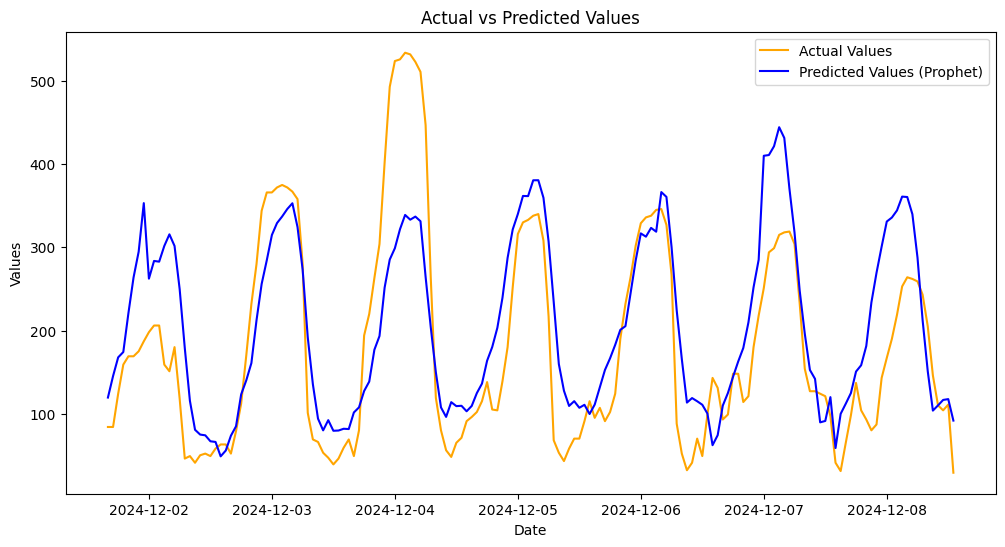

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_results['ds'], df_results['y'], label='Actual Values', color='orange')

# Plot predicted values
plt.plot(df_results['ds'], df_results['yhat'], label='Predicted Values (Prophet)', color='blue')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()


# DARTS

# LSTM 

# CNN 